In [ ]:
# Supervised Regression Assignment
# Predict (x, y) coordinates of a bright pixel in a 50x50 grayscale image
# 1. Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


np.random.seed(42)

In [9]:
# 2. Dataset Generation

def generate_dataset(num_samples=10000, img_size=50):
    """Generates synthetic images of size img_size x img_size
    with exactly one pixel set to 255 and others set to 0.
    Returns images and corresponding (x, y) coordinates.
    """
    X = np.zeros((num_samples, img_size, img_size, 1))
    y = np.zeros((num_samples, 2))

    for i in range(num_samples):
        x_coord = np.random.randint(0, img_size)
        y_coord = np.random.randint(0, img_size)
        X[i, y_coord, x_coord, 0] = 255.0
        y[i] = [x_coord, y_coord]

    # Normalize pixel values
    X = X / 255.0
    return X, y

In [10]:
# Generate data
X, y = generate_dataset()

# Train-validation-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (8000, 50, 50, 1)
Validation shape: (1000, 50, 50, 1)
Test shape: (1000, 50, 50, 1)


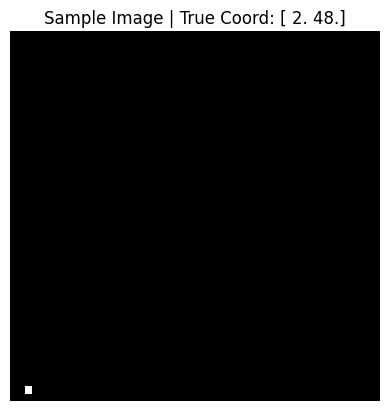

In [ ]:
# 3. Visualize Sample Data
plt.imshow(X_train[0].reshape(50, 50), cmap='gray')
plt.title(f"Sample Image | True Coord: {y_train[0]}")
plt.axis('off')
plt.show()


In [ ]:
# 4. Model Architecture (CNN)
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2)  # Output: (x, y)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       247,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,802 (987.51 KB)

 Trainable params: 252,802 (987.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 5. Training
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=32
)


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 154.3840 - mae: 8.7247 - val_loss: 27.5693 - val_mae: 3.1220
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 19.8745 - mae: 2.8582 - val_loss: 14.2673 - val_mae: 2.5265
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 11.3954 - mae: 2.3062 - val_loss: 9.1051 - val_mae: 2.0294
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 7.6066 - mae: 1.8768 - val_loss: 6.9434 - val_mae: 1.8049
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 5.2505 - mae: 1.5337 - val_loss: 4.4936 - val_mae: 1.3561
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 3.4171 - mae: 1.2026 - val_loss: 2.8771 - val_mae: 1.0627
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.1791 - mae: 0.9461 - val_loss: 2.1871 - val_mae: 1.0248
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.4460 - mae: 0.7904 - val_loss: 1.4954 - val_mae: 0.8488
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s

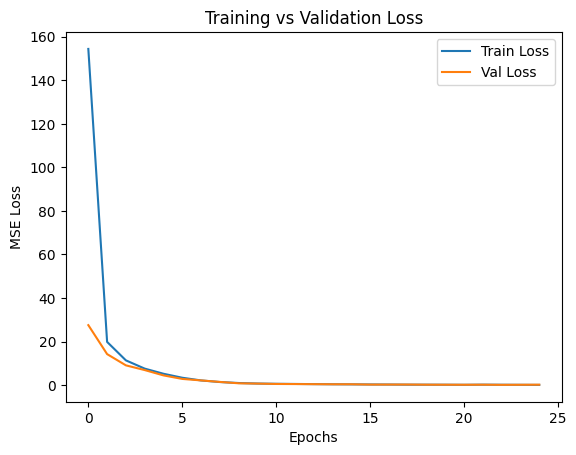

In [ ]:
# 6. Training Curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [ ]:
# 7. Evaluation
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2400 - mae: 0.3809
Test MSE: 0.2400
Test MAE: 0.3809


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


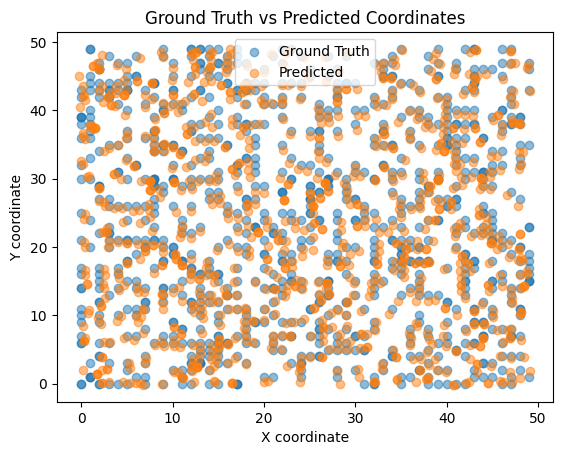

In [16]:
# 8. Predictions vs Ground Truth
y_pred = model.predict(X_test)
plt.scatter(y_test[:, 0], y_test[:, 1], label='Ground Truth', alpha=0.5)
plt.scatter(y_pred[:, 0], y_pred[:, 1], label='Predicted', alpha=0.5)
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.title('Ground Truth vs Predicted Coordinates')
plt.show()

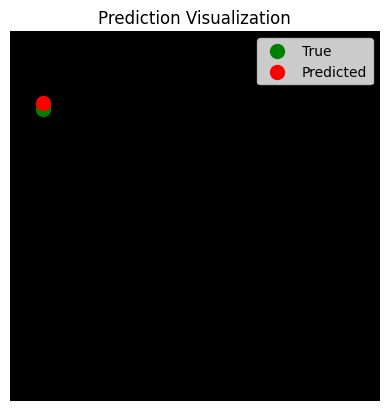

In [17]:
# 9. Visual Check on Random Samples
idx = np.random.randint(0, len(X_test))
img = X_test[idx]
true_coord = y_test[idx]
pred_coord = y_pred[idx]
plt.imshow(img.reshape(50, 50), cmap='gray')
plt.scatter(true_coord[0], true_coord[1], c='green', label='True', s=100)
plt.scatter(pred_coord[0], pred_coord[1], c='red', label='Predicted', s=100)
plt.legend()
plt.title('Prediction Visualization')
plt.axis('off')
plt.show()

In [18]:
# 10. Conclusion
# This model successfully learns the spatial mapping between
# pixel intensity location and output coordinates using
# supervised regression with a CNN architecture.